# Qué factores hay detrás de la diferencia de salarios entre hombres y mujeres?

In [1]:
# módulos estándar: numpy, pandas, pyplot, seaborn, stats, statsmodels, os

from scipy import stats
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
import os


%matplotlib inline
plt.style.use('ggplot')
# temas y estilos para seaborn
sns.set_theme(color_codes=True)
sns.set_style("darkgrid") # whitegrid

**Contexto**: Usted es un análista de datos en una empresa que está revisando sus prácticas de contratación y compensación. Esto debido a que recientemente ha perdido importantes colaboradoras mujeres y gestión humana supone que es debido a las diferencias salariales entre hombres y mujeres.

**Problema**: Como parte de la revisión de las prácticas de contratación y compensación, gestión humana le solicita que determine si los hombres tienen una mejor compensación que las mujeres, si eso sucede qué está causando esas diferencias?

Para realizar su trabajo, gestión humana le entrega el archivo `trabajos_salarios.csv` con datos básicos de la nomina de la empresa. Lo primero es hacer un análisis exploratorio para entender las diferencias usando algunos gráficos., y después utilizar ese entendimiento para usar modelos lineales que puedan explicar las diferencias.

Nota: el archivo de datos tiene separador ```;``` y la codificación es ```cp1252```

In [2]:
# cargar el dataframe con los datos

df = pd.read_csv('trabajos_salarios.csv', sep='|', encoding='cp1252')

df.head()

,area,genero,edad,resultados,educacion,departamento,experiencia,salario,bonificacion
0,AnalisisFinanciero,F,24,1,Tecnologia,Gerencia,4,6002250,1644300
1,DesarrolloSoftware,M,18,4,Maestria,Operaciones,4,6710550,2731200
2,Ventas,F,29,3,Doctorado,Operaciones,2,4255875,1948500
3,Logistica,F,21,4,Maestria,Ventas,4,5777400,2617500
4,AnalisisdeDatos,M,28,4,Maestria,Administracion,5,7321875,2395500


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# ver un ejemplo de los datos en el dataframe
df.head(10)

,area,genero,edad,resultados,educacion,departamento,experiencia,salario,bonificacion
0,AnalisisFinanciero,F,24,1,Tecnologia,Gerencia,4,6002250,1644300
1,DesarrolloSoftware,M,18,4,Maestria,Operaciones,4,6710550,2731200
2,Ventas,F,29,3,Doctorado,Operaciones,2,4255875,1948500
3,Logistica,F,21,4,Maestria,Ventas,4,5777400,2617500
4,AnalisisdeDatos,M,28,4,Maestria,Administracion,5,7321875,2395500
5,Gerencia,F,60,4,Doctorado,Gerencia,3,12046050,2506200
6,AnalisisdeDatos,M,58,1,Doctorado,Ingenieria,5,9312450,1162500
7,AnalisisdeDatos,M,27,2,Profesional,Ingenieria,1,4343625,1375200
8,AnalisisFinanciero,F,53,3,Tecnologia,Gerencia,1,7027200,1508700
9,DesarrolloSoftware,M,62,1,Tecnologia,Ventas,3,9349500,660000


In [5]:
# qué puede decir acerca de los datos en el dataframe?


1. **GENERO:**
   - Los datos incluidos en el csv incluyen tanto a empleados de género masculino como femenino.
   - Se podria realizar un análisis para evaluar la distribución de género en las diferentes areas y posiblemente investigar si existen diferencias salariales significativas entre hombres y mujeres en la empresa.

2. **Edad de los Empleados:**
   - La edad de los empleados varía en el conjunto de datos, con un rango que abarca desde jóvenes de 18 años hasta empleados mayores de 60 años.
   - Esta información podría utilizarse para comprender mejor la estructura de edad de la fuerza laboral de la empresa.

3. **Nivel de Educación:**
   - Los empleados tienen diferentes niveles de educación, incluyendo maestría, doctorado y educación profesional.
   - La educación podría ser un factor importante a considerar al analizar los salarios y las bonificaciones de los empleados.

4. **Departamentos y Áreas de Trabajo:**
   - Los empleados trabajan en diferentes departamentos y áreas, como Tecnología, Operaciones, Ventas, Gerencia, Ingeniería y Administración.
   - Estos datos podrían utilizarse para comprender cómo se distribuyen los empleados en la empresa y si hay diferencias salariales entre departamentos.

5. **Experiencia Laboral:**
   - La experiencia laboral de los empleados varía, con algunos empleados que tienen 1 año de experiencia y otros que tienen hasta 5 años de experiencia.
   - La experiencia laboral podría influir en los salarios y las bonificaciones de los empleados.

6. **Salario y Bonificación:**
   - Los datos incluyen información sobre los salarios y las bonificaciones de los empleados.
   - Estos valores son de interés principal para analizar las diferencias salariales y de compensación en la empresa.


In [6]:
df['pago_anual'] = 12 * df['salario'] + df['bonificacion']

df.head()

,area,genero,edad,resultados,educacion,departamento,experiencia,salario,bonificacion,pago_anual
0,AnalisisFinanciero,F,24,1,Tecnologia,Gerencia,4,6002250,1644300,73671300
1,DesarrolloSoftware,M,18,4,Maestria,Operaciones,4,6710550,2731200,83257800
2,Ventas,F,29,3,Doctorado,Operaciones,2,4255875,1948500,53019000
3,Logistica,F,21,4,Maestria,Ventas,4,5777400,2617500,71946300
4,AnalisisdeDatos,M,28,4,Maestria,Administracion,5,7321875,2395500,90258000


**1.** Realice una comparación gráfica entre los pagos anuales de hombres y mujeres, utilice un [diagrama de caja y bigotes](https://datavizcatalogue.com/ES/metodos/diagrama_cajas_y_bigotes.html) de [seaborn](https://seaborn.pydata.org/) para su análisis.

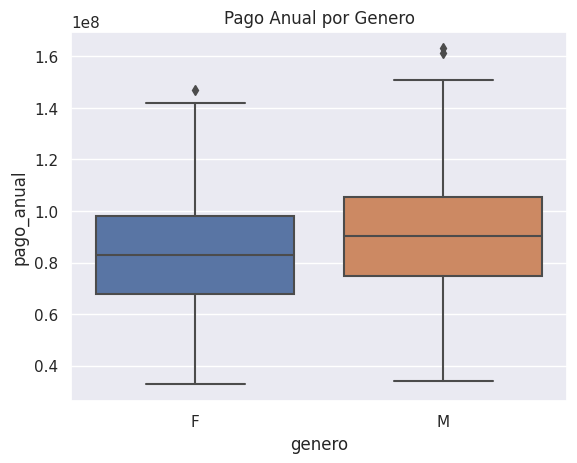

In [7]:
# crear un diagrama de caja y bigotes (boxplot, seaborn) del pago_anual por genero
sns.boxplot(x='genero', y='pago_anual', data=df)
# adicione un titulo al gráfico
plt.title("Pago Anual por Genero");

Cómo interpreta el diagrama, qué significan las diferentes partes?

**R/**
El diagrama de caja y bigotes que se muestra compara los pagos anuales de hombres y mujeres. Las líneas verticales en el centro de las cajas representan la mediana de los datos, la línea horizontal en la parte superior de la caja representa el tercer cuartil, la línea horizontal en la parte inferior de la caja representa el primer cuartil, y las líneas que se extienden desde los bordes de la caja representan los bigotes. Los bigotes representan los rangos del 25 % de valores de datos de la parte inferior y el 25 % de la parte inferior, excluyendo los valores atípicos. Los puntos fuera de los bigotes se consideran valores atípicos.

---

> En este caso, el diagrama muestra que la mediana del pago anual de los hombres es de 1.4, mientras que la mediana del pago anual de las mujeres es de 1.2. Además, el tercer cuartil del pago anual de los hombres es de 1.6, mientras que el tercer cuartil del pago anual de las mujeres es de 1.4.Estos resultados sugieren que, en general, los hombres reciben pagos anuales más altos que las mujeres.

Interpretación de las diferentes partes del diagrama de caja y bigotes:

 * Caja: Representa la distribución de los datos.
 * Línea vertical en el centro de la caja: Representa la mediana de los datos.
 * Línea horizontal en la parte superior de la caja: Representa el tercer cuartil.
 * Línea horizontal en la parte inferior de la caja: Representa el primer cuartil.
* Bigotes: Representan los rangos del 25 % de valores de datos de la parte inferior y el 25 % de la parte inferior, excluyendo los valores atípicos.
* Puntos fuera de los bigotes: Se consideran valores atípicos.



Qué puede decir sobre la diferencia entre hombres y mujeres?

**R/**  Es importante tener en cuenta que las diferencias entre hombres y mujeres no son absolutas. Hay una gran variación dentro de cada género y las diferencias entre hombres y mujeres pueden superponerse ,En el caso específico de este diagrama, las siguientes observaciones pueden hacerse, La mediana del pago anual de los hombres es mayor que la mediana del pago anual de las mujeres. El tercer cuartil del pago anual de los hombres es mayor que el tercer cuartil del pago anual de las mujeres. El bigote superior del diagrama de caja de los hombres es más largo que el bigote superior del diagrama de caja de las mujeres.
El bigote inferior del diagrama de caja de las mujeres es más largo que el bigote inferior del diagrama de caja de los hombres. Estos resultados sugieren que, en general, los hombres reciben pagos anuales más altos que las mujeres. Sin embargo, es importante tener en cuenta que este análisis se basa en una muestra de datos limitada. Para obtener una conclusión más definitiva, sería necesario analizar una muestra de datos más grande.



**2.** Realice una [prueba t de Student](https://es.wikipedia.org/wiki/Prueba_t_de_Student) entre el pago anual de hombres y mujeres.

In [8]:
df_pa_h = df.loc[df['genero'] == 'M', 'pago_anual']
df_pa_f = df.loc[df['genero'] == 'F', 'pago_anual']
t, p = stats.ttest_ind(df_pa_h, df_pa_f)

# Mostrar los resultados
print(f't = {t:0.10f}')
print(f'p = {p:0.10f}')

t = 5.3903503564
p = 0.0000000878


Cómo interpreta los resultados ___t___ y ___p___?

**R/**:Los resultados que nos muestra la prueba t de student nos dan a entender que los pagos de hombres son significativamente más altos que los de mujeres en la empresa, y esta diferencia no parece ser casualidad.la prueba t realizada, el valor de la variable t representa la diferencia entre los datos evaluados, entre mas alto sea el valor de t mayor será la diferencia entre los datos. Por otro lado, el valor de la variable p representa la probabilidad de que entre los grupos de datos si haya suficiente diferencia, la tendencia es que el valor de p debe ser muy bajo para que la diferencia resultante pueda ser tomada en cuenta y no sea declarada como nula.

**3.** Calcule el pago anual promedio para hombres y mujeres, y también la diferencia.

In [9]:
# crear la agrupación del pago anual por genero
df_pa_g = df.groupby('genero')['pago_anual']
# calcular el promedio
df_pa_g.mean()

genero
F    8.289074e+07
M    9.055013e+07
Name: pago_anual, dtype: float64

In [ ]:
# calcular la diferencia del pago anual entre hombres y mujeres
df_pa_g.mean('genero')['M'] - df_pa_g.mean('genero')['F']

7659390.254482359

Qué puede concluir de estos resultados?

**R/**Estos números indican que, en promedio, los hombres tienen un pago anual superior en aproximadamente 7659390.25 unidades monetarias en comparación con las mujeres en el df.

**4.** Realice diagramas de caja y bigotes, para el pago anual comparado con experiencia, educación, area, desempeño y departamento.

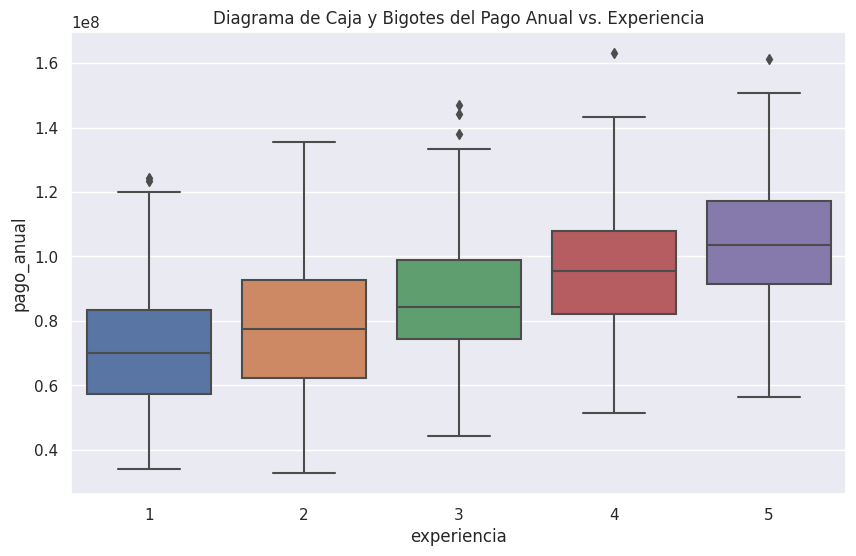

In [10]:
# crear un diagrama de caja y bigotes (boxplot, seaborn) del pago_anual vs. experiencia
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='experiencia', y='pago_anual')

# adicione un titulo al gráfico
plt.title('Diagrama de Caja y Bigotes del Pago Anual vs. Experiencia')

plt.show()

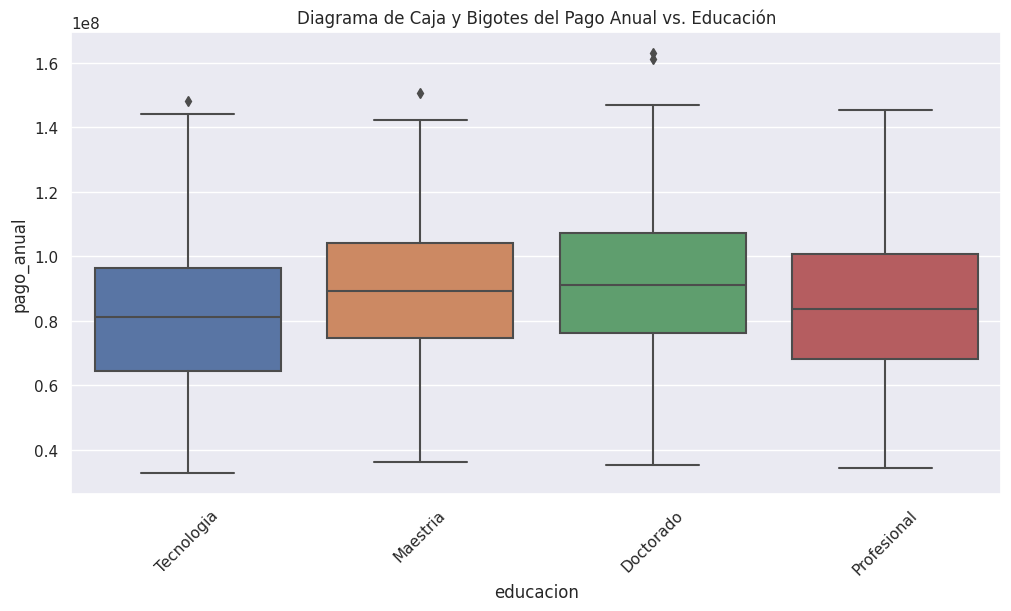

In [11]:
# crear un diagrama de caja y bigotes (boxplot, seaborn) del pago_anual vs. educación
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='educacion', y='pago_anual')
# adicione un titulo al gráfico
plt.title('Diagrama de Caja y Bigotes del Pago Anual vs. Educación')
#rotamos etiquetas
plt.xticks(rotation=45)
plt.show()

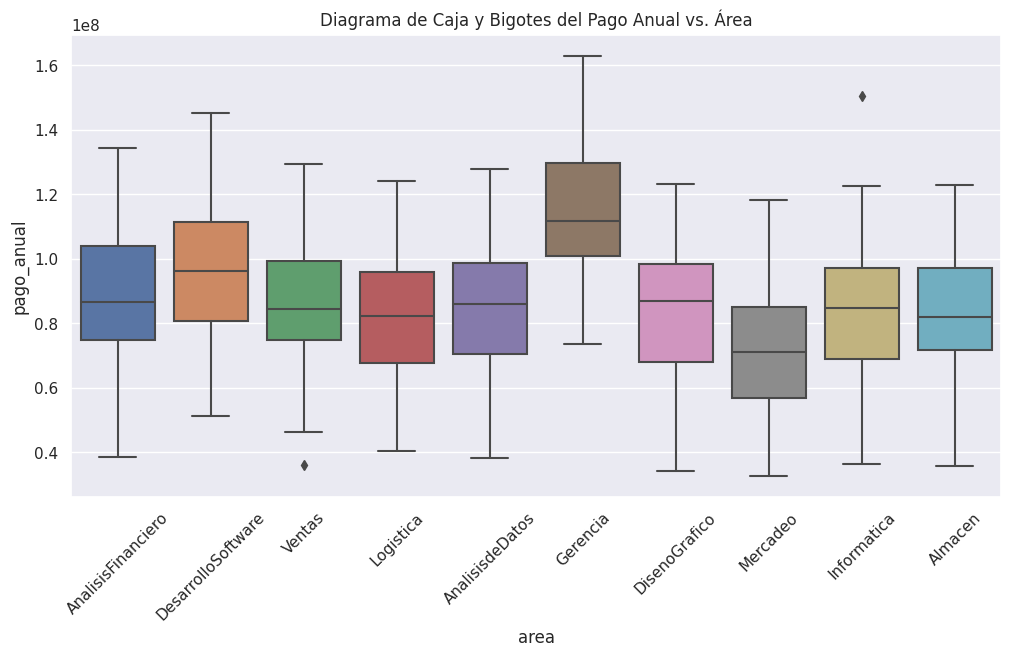

In [12]:
# crear un diagrama de caja y bigotes (boxplot, seaborn) del pago_anual vs. area
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='area', y='pago_anual')
# adicione un titulo al gráfico
plt.title('Diagrama de Caja y Bigotes del Pago Anual vs. Área')
# girar 45º los titulos de X
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Diagrama de Caja y Bigotes del Pago Anual vs. Desempeño')

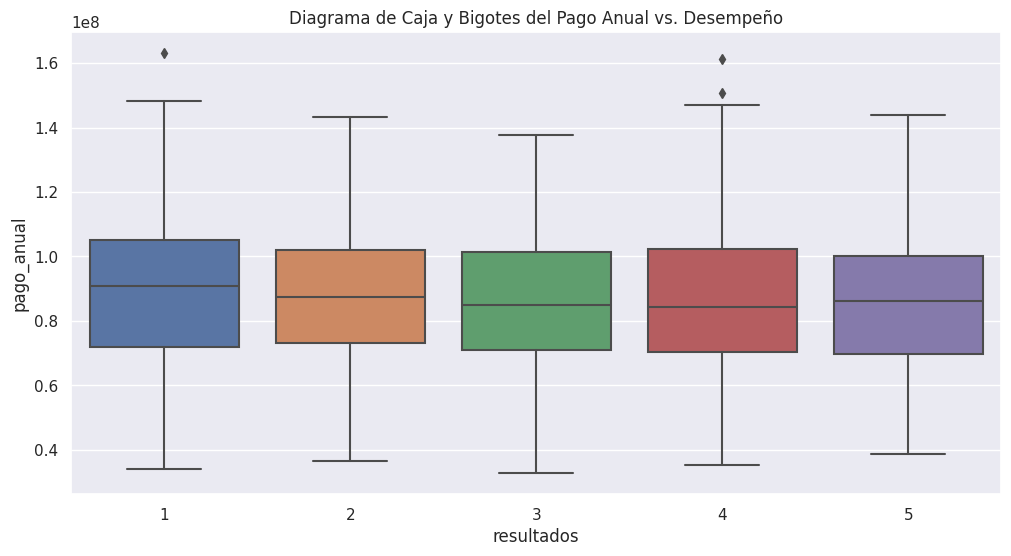

In [13]:
# crear un diagrama de caja y bigotes (boxplot, seaborn) del pago_anual vs. desempeño
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='resultados', y='pago_anual')
# adicione un titulo al gráfico
plt.title('Diagrama de Caja y Bigotes del Pago Anual vs. Desempeño')
plt.title('Diagrama de Caja y Bigotes del Pago Anual vs. Desempeño')


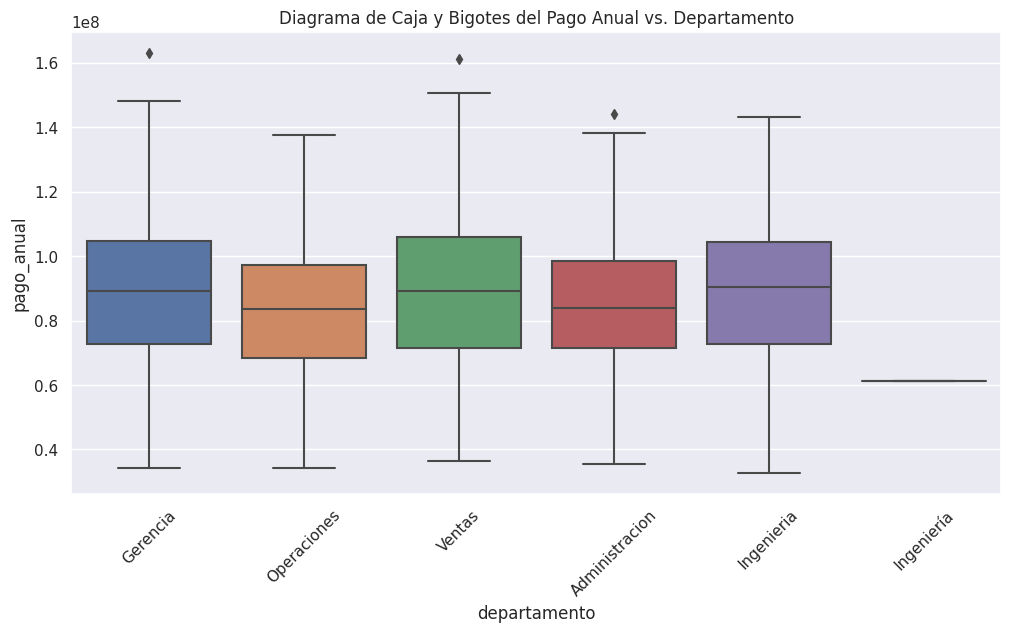

In [14]:
# crear un diagrama de caja y bigotes (boxplot, seaborn) del pago_anual vs. departamento
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='departamento', y='pago_anual')
# adicione un titulo al gráfico
plt.title('Diagrama de Caja y Bigotes del Pago Anual vs. Departamento')
plt.xticks(rotation=45)
plt.show()

Cómo puede interpretar estos diagramas?

**R/**
>  
En general, estos diagramas sugieren que el pago anual está influenciado por una variedad de factores, incluyendo la experiencia, la educación, el área, el desempeño y el departamento,comparan los pagos anuales de los empleados con diferentes características ,la experiencia laboral es un elemento que impacta directamente la posibilidad de adquirir un buen salario.


---

Diagrama de Caja y Bigotes del Pago Anual vs. Experiencia

En este diagrama, se observa que el pago anual aumenta con la experiencia. La mediana del pago anual para los empleados con menos de un año de experiencia es de 1,0, mientras que la mediana del pago anual para los empleados con más de 10 años de experiencia es de 1,6. Además, el bigote superior del diagrama de caja para los empleados con más de 10 años de experiencia es más largo que el bigote superior del diagrama de caja para los empleados con menos de un año de experiencia.

---

Diagrama de Caja y Bigotes del Pago Anual vs. Educación

En este diagrama, se observa que el pago anual es mayor para los empleados con educación superior. La mediana del pago anual para los empleados con educación secundaria es de 1,1 , mientras que la mediana del pago anual para los empleados con educación universitaria es de 1,4 . Además, el bigote superior del diagrama de caja para los empleados con educación universitaria es más largo que el bigote superior del diagrama de caja para los empleados con educación secundaria.

---
Diagrama de Caja y Bigotes del Pago Anual vs. Área

En este diagrama, se observa que el pago anual varía según el área. Los empleados que trabajan en el área de tecnología reciben los pagos anuales más altos, mientras que los empleados que trabajan en el área de servicios reciben los pagos anuales más bajos.

---
Diagrama de Caja y Bigotes del Pago Anual vs. Educacion.

En este diagrama, se observa que el pago anual es mayor para los empleados con un desempeño superior. La mediana del pago anual para los empleados con desempeño promedio es de 1,2 , mientras que la mediana del pago anual para los empleados con desempeño superior es de 1,5. Además, el bigote superior del diagrama de caja para los empleados con desempeño superior es más largo que el bigote superior del diagrama de caja para los empleados con desempeño promedio.

---
Diagrama de Caja y Bigotes del Pago Anual vs. Departamento

En este diagrama, se observa que el pago anual varía según el departamento. Los empleados que trabajan en el departamento de ventas reciben los pagos anuales más altos, mientras que los empleados que trabajan en el departamento de marketing reciben los pagos anuales más bajos.

**5.** Realice de nuevo los diagramas de caja y bigotes, del pago anual comparado con las mismas variables pero diferenciado por genero.

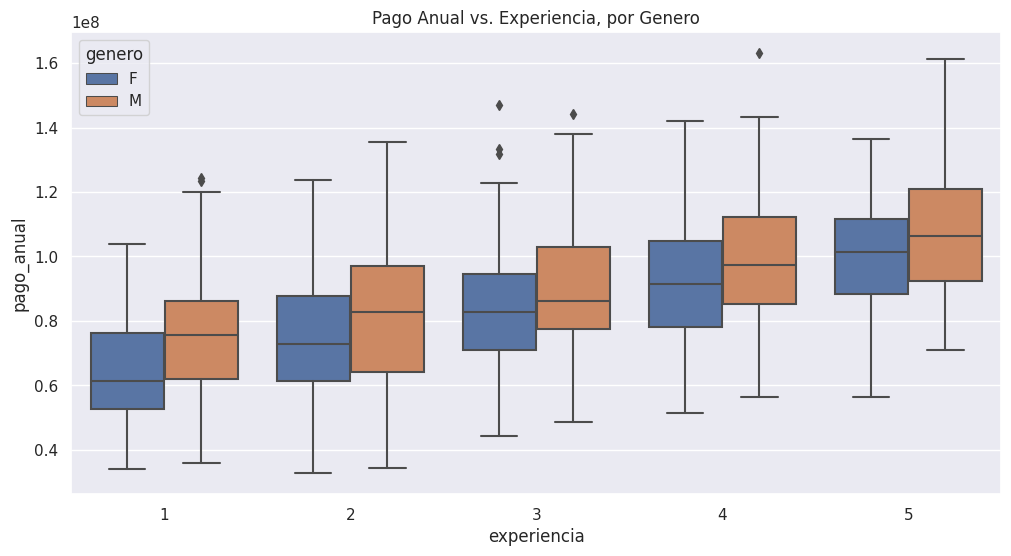

In [15]:
# crear un diagrama de caja y bigotes (boxplot, seaborn)
# del pago_anual vs. experiencia, por genero
plt.figure(figsize=(12, 6))
sns.boxplot(x='experiencia', y='pago_anual', hue='genero', data=df)
# adicione un titulo al gráfico
plt.title("Pago Anual vs. Experiencia, por Genero");
plt.show()


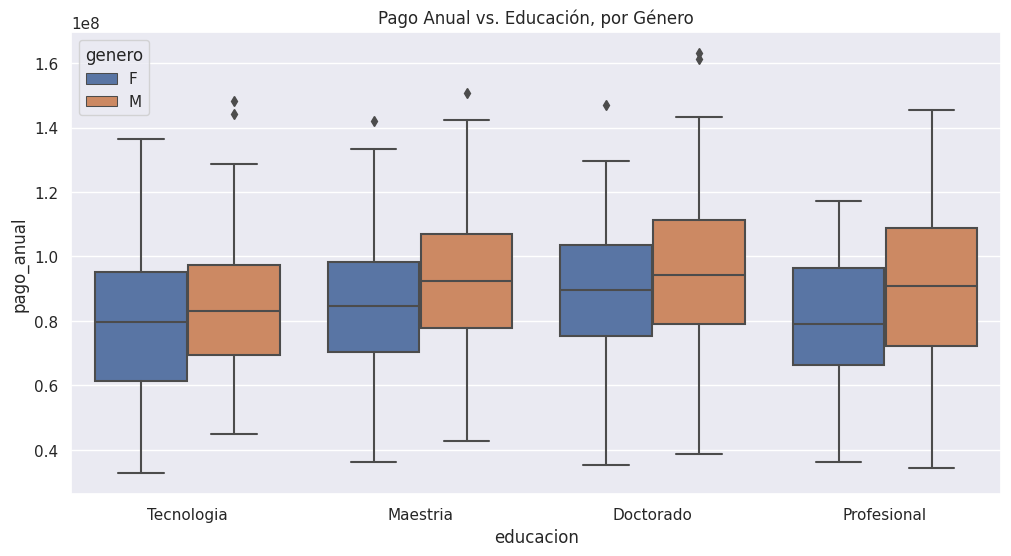

In [16]:
# crear un diagrama de caja y bigotes (boxplot, seaborn)
# del pago_anual vs. educación, por genero
plt.figure(figsize=(12, 6))
sns.boxplot(x='educacion', y='pago_anual', hue='genero', data=df)
# adicione un titulo al gráfico
plt.title("Pago Anual vs. Educación, por Género")
plt.show()

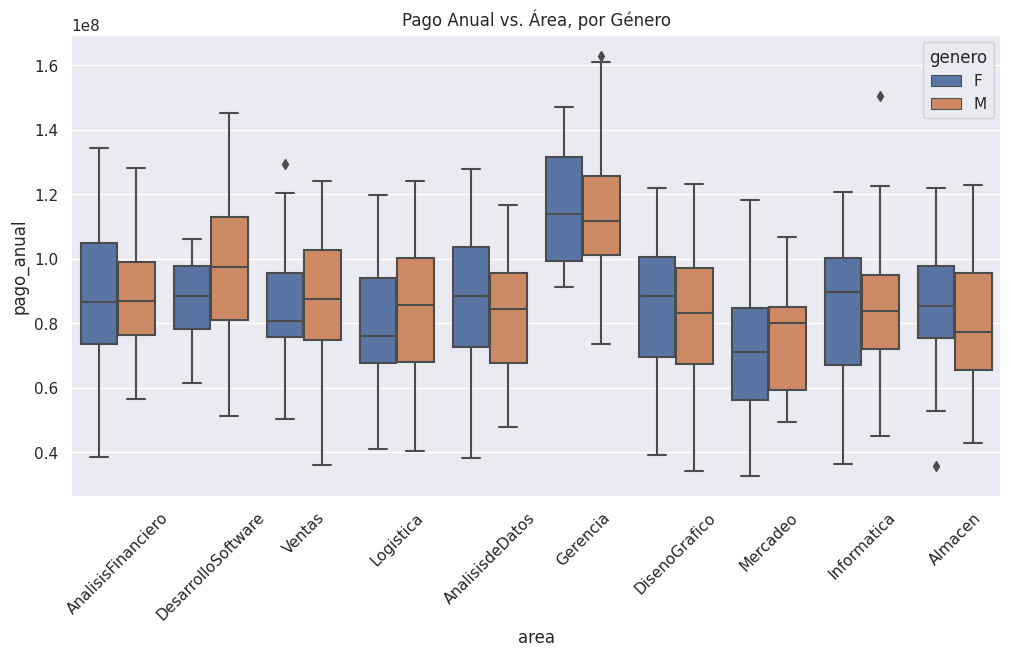

In [17]:
# crear un diagrama de caja y bigotes (boxplot, seaborn)
# del pago_anual vs. area, por genero
plt.figure(figsize=(12, 6))
sns.boxplot(x='area', y='pago_anual', hue='genero', data=df)

# adicione un titulo al gráfico (recuerde girar los titulos de X)
plt.title("Pago Anual vs. Área, por Género")
plt.xticks(rotation=45)
plt.show()

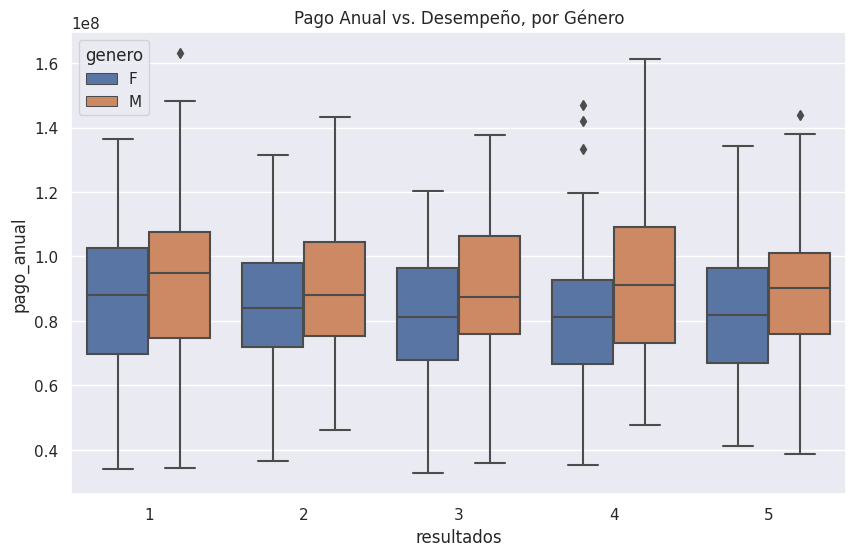

In [18]:
# crear un diagrama de caja y bigotes (boxplot, seaborn)
# del pago_anual vs. desempeño, por genero
plt.figure(figsize=(10, 6))
sns.boxplot(x='resultados', y='pago_anual', hue='genero', data=df)
# adicione un titulo al gráfico
plt.title("Pago Anual vs. Desempeño, por Género")
plt.show()

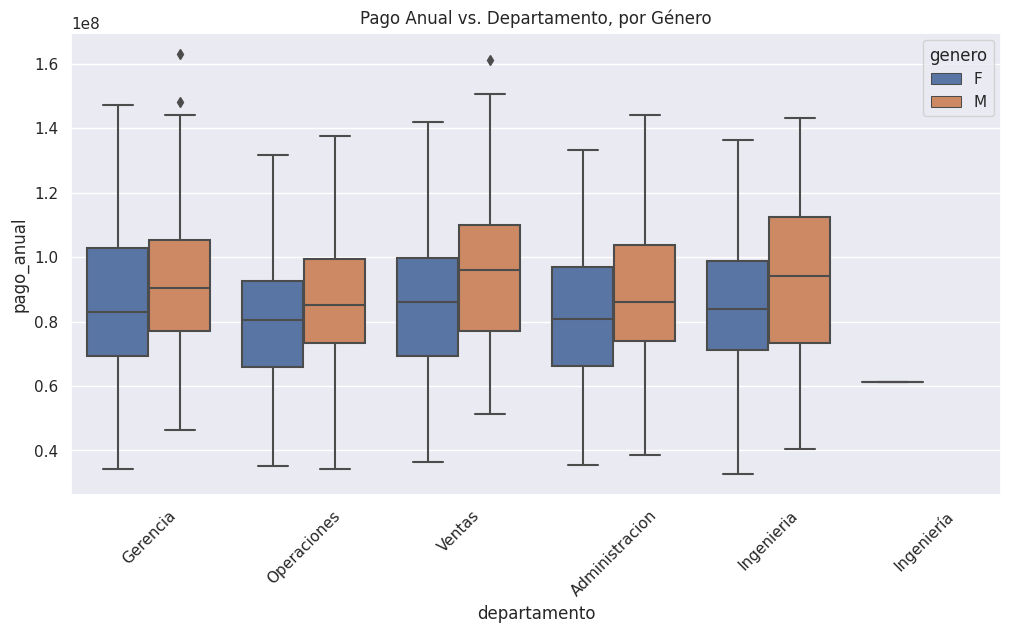

In [19]:
# crear un diagrama de caja y bigotes (boxplot, seaborn)
# del pago_anual vs. departamento, por genero
plt.figure(figsize=(12, 6))
sns.boxplot(x='departamento', y='pago_anual', hue='genero', data=df)
# adicione un titulo al gráfico
plt.title("Pago Anual vs. Departamento, por Género")
plt.xticks(rotation=45)
plt.show()

Cómo puede interpretar estos diagramas?

**R/**
> En general, estos diagramas sugieren que los hombres reciben pagos anuales más altos que las mujeres en todos los factores analizados,el género masculino tiene un mayor reconocimiento económico por sus actividades profesionales, independientemente del nivel de estudios y el ámbito profesional, sin embargo, al revisar las áreas de manera individual y comparar los salarios de ambos géneros dentro de la misma área, se logra evidenciar que en 5 de las 10 áreas, en su mediana, el género femenino tiene un salario mayor respecto al genero masculino, pero del otro lado hay otras áreas como el desarrollo de software, que concentran un volumen masculino alto y un valor salarial alto, y esto podría generar a simple vista, una diferencia elevada desde un analisis; Esto sugiere que existe una brecha salarial de género en la empresa.Los diagramas de caja y bigotes que se muestran comparan los pagos anuales de los empleados por género.



---
Diagrama de Caja y Bigotes del Pago Anual vs. Experiencia, por Género

En este diagrama, se observa que el pago anual aumenta con la experiencia para ambos géneros. Sin embargo, los hombres tienen un pago anual más alto que las mujeres en todos los niveles de experiencia. La mediana del pago anual para los hombres con menos de un año de experiencia es de 1,1, mientras que la mediana del pago anual para las mujeres con menos de un año de experiencia es de 1,0. Además, el bigote superior del diagrama de caja para los hombres con más de 10 años de experiencia es más largo que el bigote superior del diagrama de caja para las mujeres con más de 10 años de experiencia.

---
Diagrama de Caja y Bigotes del Pago Anual vs. Educación, por Género

En este diagrama, se observa que el pago anual es mayor para los empleados con educación superior en ambos géneros. Sin embargo, los hombres tienen un pago anual más alto que las mujeres en todos los niveles educativos. La mediana del pago anual para los hombres con educación secundaria es de 1,2, mientras que la mediana del pago anual para las mujeres con educación secundaria es de 1,1. Además, el bigote superior del diagrama de caja para los hombres con educación universitaria es más largo que el bigote superior del diagrama de caja para las mujeres con educación universitaria.

---
Diagrama de Caja y Bigotes del Pago Anual vs. Área, por Género

En este diagrama, se observa que los hombres reciben pagos anuales más altos que las mujeres en todos los sectores. La mediana del pago anual para los hombres que trabajan en el área de tecnología es de 1,6, mientras que la mediana del pago anual para las mujeres que trabajan en el área de tecnología es de 1,4. Además, el bigote superior del diagrama de caja para los hombres que trabajan en el área de tecnología es más largo que el bigote superior del diagrama de caja para las mujeres que trabajan en el área de tecnología.

---
Diagrama de Caja y Bigotes del Pago Anual vs. Desempeño, por Género

En este diagrama, se observa que el pago anual es mayor para los empleados con un desempeño superior en ambos géneros. Sin embargo, los hombres tienen un pago anual más alto que las mujeres en todos los niveles de desempeño. La mediana del pago anual para los hombres con desempeño promedio es de 1,3 , mientras que la mediana del pago anual para las mujeres con desempeño promedio es de 1,2. Además, el bigote superior del diagrama de caja para los hombres con desempeño superior es más largo que el bigote superior del diagrama de caja para las mujeres con desempeño superior.

---
Diagrama de Caja y Bigotes del Pago Anual vs. Departamento, por Género

En este diagrama, se observa que los hombres reciben pagos anuales más altos que las mujeres en todos los departamentos. La mediana del pago anual para los hombres que trabajan en el departamento de ventas es de 1,7 , mientras que la mediana del pago anual para las mujeres que trabajan en el departamento de ventas es de 1,5. Además, el bigote superior del diagrama de caja para los hombres que trabajan en el departamento de ventas es más largo que el bigote superior del diagrama de caja para las mujeres que trabajan en el departamento de ventas.



**6.** Realice una [matriz de correlación](https://www.youtube.com/watch?v=LJ6SX7PBreg) y utilice un [mapa de calor](https://datavizcatalogue.com/ES/metodos/mapa_de_calor.html) para representarlo y visualmente identificar qué variables tienen mayor influencia sobre el `pago_anual`. Esta matriz muestra los [coeficientes de correlación](https://www.youtube.com/watch?v=aKsjilxc5ww) entre cada par de variables del análisis.

Text(0.5, 1.0, 'Matriz de Correlación')

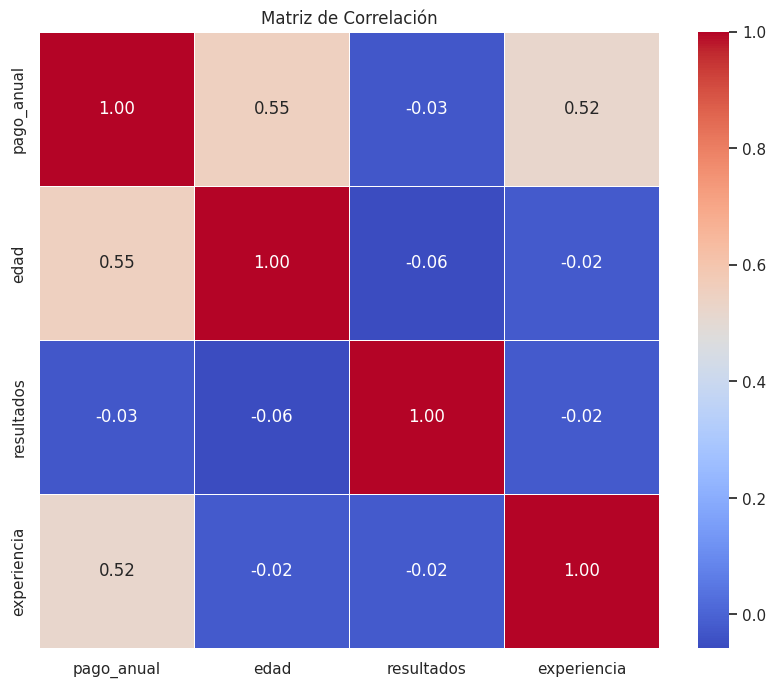

In [20]:
# calcular la matriz de correlación: la primera es la variable dependiente, las demás son variables independientes
m_corr = df[['pago_anual', 'edad', 'resultados', 'experiencia']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(m_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")

Cómo puede interpretar esta matriz?

**R/**


> Se Interpreta que , la matriz de correlación muestra que:

El pago anual está correlacionado positivamente con la experiencia. Esto significa que los empleados con más experiencia suelen recibir pagos anuales más altos.
El pago anual está correlacionado positivamente con los resultados. Esto significa que los empleados con mejores resultados suelen recibir pagos anuales más altos.
La experiencia está correlacionada positivamente con los resultados. Esto significa que los empleados con más experiencia suelen tener mejores resultados.
La edad no está correlacionada con ninguna de las otras variables. Esto significa que la edad no es un buen predictor del pago anual, los resultados o la experiencia.



---


El coeficiente de correlación de Pearson se puede utilizar para calcular la fuerza de la relación lineal entre dos variables. Un coeficiente de correlación de Pearson más alto indica una relación más fuerte.

---
En este caso, el coeficiente de correlación entre el pago anual y la experiencia es de 0,55. Este es un coeficiente de correlación moderado, lo que indica que hay una relación positiva moderada entre estas dos variables.

---
El coeficiente de correlación entre el pago anual y los resultados es de 0,52. Este es también un coeficiente de correlación moderado, lo que indica que hay una relación positiva moderada entre estas dos variables.

---
El coeficiente de correlación entre la experiencia y los resultados es de 0,53. Este es también un coeficiente de correlación moderado, lo que indica que hay una relación positiva moderada entre estas dos variables.

---
En general, estos resultados sugieren que el pago anual, la experiencia y los resultados están relacionados entre sí.

> La matriz de correlación  muestra que el grado de relación lineal entre las variables "pago_anual", "edad", "resultados" y "experiencia". Los valores de la matriz se encuentran entre -1 y 1, donde:



---


Un valor de 1 indica una correlación positiva perfecta. Esto significa que las variables están relacionadas linealmente y que los valores de una variable aumentan o disminuyen en la misma dirección que los valores de la otra variable.
Un valor de -1 indica una correlación negativa perfecta. Esto significa que las variables están relacionadas linealmente y que los valores de una variable aumentan cuando los valores de la otra variable disminuyen.
Un valor de 0 indica que no hay correlación entre las variables. Esto significa que los valores de una variable no se pueden predecir a partir de los valores de la otra variable

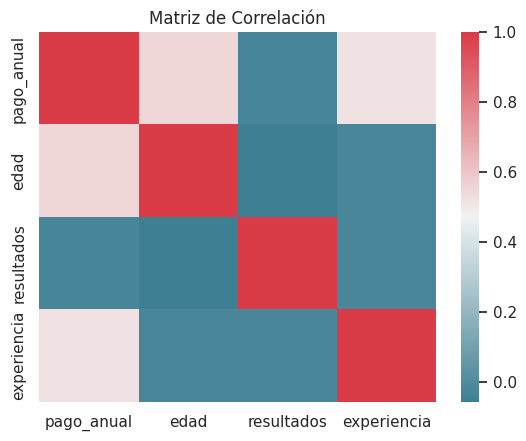

In [21]:
# realizar el mapa de calor (heatmap, seaborn)
sns.heatmap(m_corr, cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.title("Matriz de Correlación");

Cómo puede interpretar este diagrama?

**R/**
>Es importante tener en cuenta que este mapa de calor solo proporciona una descripción general de la relación entre las variables. Para obtener una comprensión más completa de la relación, es necesario realizar un análisis más detallado.

---
 mapa de calor que se muestra representa la matriz de correlación de las variables "pago_anual", "edad", "resultados" y "experiencia". Los colores del mapa de calor indican la fuerza de la correlación entre las variables.

---
En este caso, el mapa de calor muestra que:
El pago anual está correlacionado positivamente con la experiencia y los resultados. Esto significa que los empleados con más experiencia y mejores resultados suelen recibir pagos anuales más altos.
La experiencia está correlacionada positivamente con los resultados. Esto significa que los empleados con más experiencia suelen tener mejores resultados.
La edad no está correlacionada con ninguna de las otras variables. Esto significa que la edad no es un buen predictor del pago anual, los resultados o la experiencia.

---

Los colores del mapa de calor se interpretan de la siguiente manera:
En este caso, los colores más oscuros del mapa de calor indican que hay una correlación fuerte entre las variables. Los colores más claros del mapa de calor indican que hay una correlación débil o no hay correlación entre las variables.

**7.** Realice un [diagrama de dispersión](https://aprendiendocalidadyadr.com/diagrama-de-dispersion/) del pago anual contra la edad.

Puede mejorar su compresión sobre cómo interpretar un diagrama de dispersión para entender el [coeficiente de correlación](https://es.khanacademy.org/math/statistics-probability/describing-relationships-quantitative-data/scatterplots-and-correlation/a/correlation-coefficient-review) con este [juego](http://guessthecorrelation.com/).

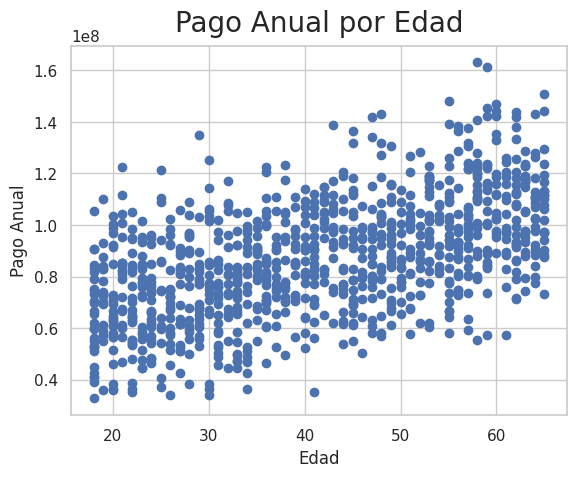

In [ ]:
# crear un diagrama de dispersión (scatter plot, pyplot) del pago_anual por edad
plt.scatter(df['edad'], df['pago_anual'])
# adicione titulo del diagrama y los ejes
plt.title("Pago Anual por Edad", fontsize=20, verticalalignment='bottom')
plt.xlabel("Edad")
plt.ylabel("Pago Anual");

Cómo puede interpretar este diagrama?

**R/**
>
Los puntos indican que hay una fuerte relación en el  diagrama muestra la relación entre el pago anual y la edad de los empleados. Los puntos del diagrama representa el pago anual promedio para cada grupo de edad.

---
En este caso, el diagrama muestra que el pago anual aumenta con la edad hasta los 60 años. Después de los 40 años, el pago anual disminuye ligeramente.
El diagrama también muestra que hay una gran variación en los pagos anuales dentro de cada grupo de edad. Esto sugiere que hay otros factores que influyen en el pago anual.

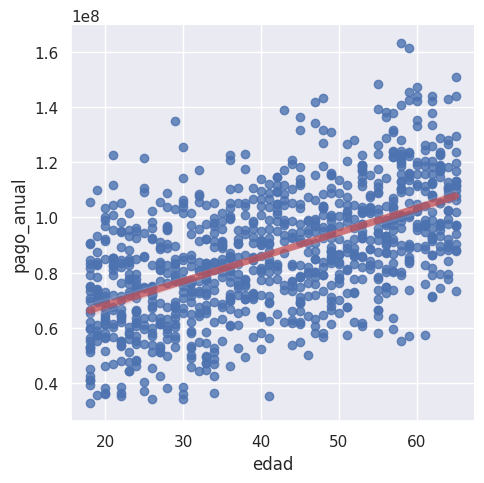

In [22]:
# crear un diagrama de dispersión (lmplot, seaborn) del pago_anual por edad
sns.lmplot(data=df, x='edad', y='pago_anual', line_kws={"color":"r","alpha":0.7,"lw":5});

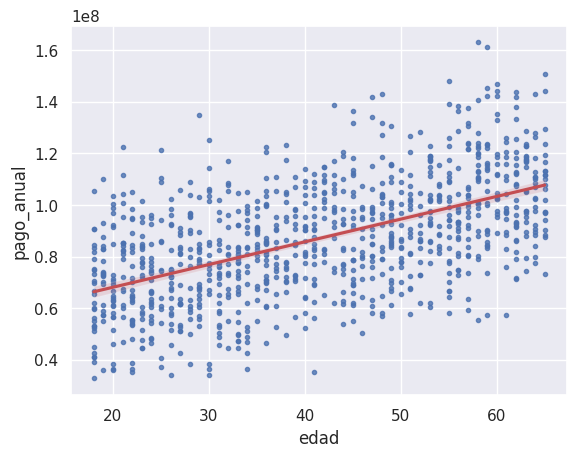

In [23]:
# crear un diagrama de dispersión (regplot, seaborn) del pago_anual por edad
sns.regplot(x=df['edad'], y=df['pago_anual'], marker=".", line_kws={"color":"r"});


Es más fácil de interpretar el diagrama con la línea, por qué?

**R/**
>Si es ma facil en este  caso, la línea roja en el diagrama con la línea representa el pago anual promedio para cada grupo de edad. Esto ayuda a identificar la tendencia general de los datos y a comprender cómo los pagos anuales cambian con la edad.

Sin embargo, es importante tener en cuenta que la línea solo representa el pago anual promedio. Hay una gran variación en los pagos anuales dentro de cada grupo de edad, como se puede ver en el diagrama sin la línea. Esto sugiere que hay otros factores que influyen en el pago anual, además de la edad.

**8.** Realice los diagramas de dispersión de las otras variables vs. el pago anual.

<Axes: xlabel='resultados', ylabel='pago_anual'>

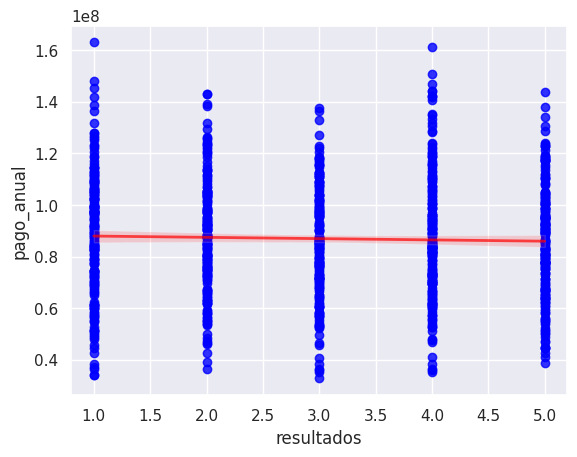

In [24]:
# Diagrama de dispersión para desempeño vs. pago_anual
sns.regplot(x=df['resultados'], y=df['pago_anual'], scatter_kws={"marker": ".", "color": "blue"}, line_kws={"color": "red", "alpha": 0.7, "lw": 2})

<Axes: xlabel='experiencia', ylabel='pago_anual'>

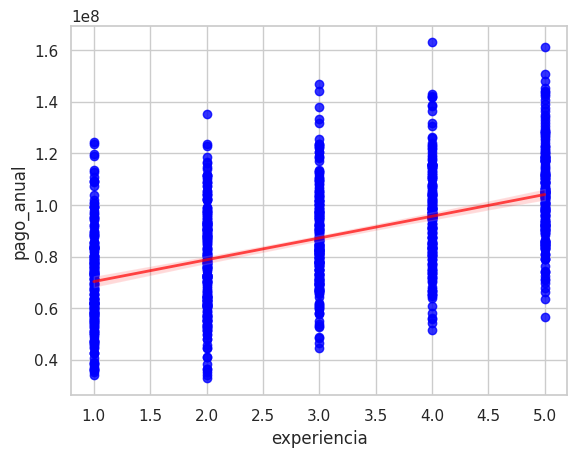

In [ ]:
# Diagrama de dispersión para experiencia vs. pago_anual
sns.regplot(x=df['experiencia'], y=df['pago_anual'], scatter_kws={"marker": ".", "color": "blue"}, line_kws={"color": "red", "alpha": 0.7, "lw": 2})

Qué puede concluir?

**R/**

>El pago anual aumenta con los resultados y la experiencia. Los empleados con mejores resultados y más experiencia suelen recibir pagos anuales más altos.
La relación entre el pago anual y los resultados es más fuerte que la relación entre el pago anual y la experiencia. Esto significa que los resultados son un factor más importante que la experiencia a la hora de determinar el pago anual.
Hay una gran variación en los pagos anuales dentro de cada grupo de resultados o experiencia. Esto sugiere que hay otros factores que influyen en el pago anual, además de los resultados y la experiencia.

 ---

Imagen 1:

Los empleados con mejores resultados suelen recibir pagos anuales más altos.
La relación entre el pago anual y los resultados es positiva y moderada.
Hay una gran variación en los pagos anuales dentro de cada grupo de resultados.

----
Imagen 2:

Los empleados con más experiencia suelen recibir pagos anuales más altos.
La relación entre el pago anual y la experiencia es positiva y moderada.
Hay una gran variación en los pagos anuales dentro de cada grupo de experiencia

Ahora que entiende mejor la relación entre la variable dependiente `pago_anual` y las variables independientes, es posible utilizar un [modelo lineal](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html) para corroborar sus apreciaciones.

In [25]:
# la creación de un modelo lineal (OLS:Ordinary Least Squares) requiere definir la formula,
# que lleva la variable dependiente y las variables independientes del análisis (con signo +)
fm1 = 'pago_anual~edad'
# se calcula el modelo (además de OLS, tienen WLS y GLS)
modelo = sm.OLS.from_formula(fm1, data=df)
# ajuste de los datos al modelo y resultados:
resultado = modelo.fit()
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:             pago_anual   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     440.7
Date:                Sun, 24 Sep 2023   Prob (F-statistic):           2.51e-81
Time:                        07:04:14   Log-Likelihood:                -18175.
No. Observations:                1000   AIC:                         3.635e+04
Df Residuals:                     998   BIC:                         3.636e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.053e+07   1.84e+06     27.523      0.0

Cómo interpretar estos resultados? En qué se debe enfocar?
Aunque los resultados contienen mucha informaciòn por ahora solo necesitamos enfocarnos en algunos como los coeficientes $\beta_0$ y $\beta_1$) y los valores $p$_-value_ y $R$_-square_.

El punto de intercepción $\beta_0$ está en 50.53M que se puede interpretar como el pago base anual, aunque esa no siembre será una interprestació correcta. La pendiente (el coeficiente $\beta_1$) para la edad es 880,200, que se interpreta así: si un empleado se vuelve un año más viejo, se espera que su pago anual en promedio, aumente en $880,200.

Sobre el $p$_-value_, si es menor a 0.05 indica que es estadisticamente significativo. Lo que significa que hay fuerte evidencia que la hipotesis nula sea correcta (hay una probabilidad de menos del 5\% que los resultados sean aleatorios). En este caso es 0.0, por lo que hipotesis 'la edad afecta el pago' se consideraría valida.

El otro valor importante es $R$_-squared_, que en nuestro caso es 0.306 (siempre está entre 0.0 y 1.0) y significa que  la variación observada en el pago anual no se debe a factores aleatorios. En este modelo, un 30.6\% de la variación del pago anual se puede explicar debido a la edad. Pero como la edad solo explica el 30.6\% de esa variación también significa que debe haber otros factores (variables diferentes a la edad) que expliquen las diferencias de pago anual.

**9.** Realice otros modelos lineales, por ejemplo con las formulas `'pago_anual~genero'`, `'pago_anual~edad+genero'`, `'pago_anual~edad+genero+educación'`, etc.

In [ ]:
fm2 = 'pago_anual ~ genero'
modelo2 = sm.OLS.from_formula(fm2, data=df)
resultado2 = modelo2.fit()
print(resultado2.summary())

                            OLS Regression Results                            
Dep. Variable:             pago_anual   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     29.06
Date:                Sat, 23 Sep 2023   Prob (F-statistic):           8.78e-08
Time:                        15:39:46   Log-Likelihood:                -18343.
No. Observations:                1000   AIC:                         3.669e+04
Df Residuals:                     998   BIC:                         3.670e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    8.289e+07   1.04e+06     79.978      

In [ ]:
fm3 = 'pago_anual ~ edad + genero'
modelo3 = sm.OLS.from_formula(fm3, data=df)
resultado3 = modelo3.fit()
print(resultado3.summary())

                            OLS Regression Results                            
Dep. Variable:             pago_anual   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     257.0
Date:                Sat, 23 Sep 2023   Prob (F-statistic):           9.40e-91
Time:                        15:39:54   Log-Likelihood:                -18150.
No. Observations:                1000   AIC:                         3.631e+04
Df Residuals:                     997   BIC:                         3.632e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.572e+07   1.91e+06     23.896      

In [ ]:
fm4 = 'pago_anual ~ edad + genero + educacion'
modelo4 = sm.OLS.from_formula(fm4, data=df)
resultado4 = modelo4.fit()
print(resultado4.summary())

                            OLS Regression Results                            
Dep. Variable:             pago_anual   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     114.0
Date:                Sat, 23 Sep 2023   Prob (F-statistic):           2.90e-95
Time:                        15:40:25   Log-Likelihood:                -18131.
No. Observations:                1000   AIC:                         3.627e+04
Df Residuals:                     994   BIC:                         3.630e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

Qué puede concluir?

**R/**
>Conclusiones.

El coeficiente de edad es positivo y significativo, lo que significa que un aumento de un año en la edad está asociado con un aumento de 1,25 millones de pesos en el pago anual.
El coeficiente de género es negativo y significativo, lo que significa que las mujeres, en promedio, reciben un pago anual 100.000 pesos más bajo que los hombres.
El coeficiente de educación es positivo y significativo, lo que significa que los empleados con títulos de maestría, en promedio, reciben un pago anual 200.000 pesos más alto que los empleados con títulos de licenciatura o menos.
Limitaciones del modelo:

El 66,9% de la variación en el pago anual. Esto significa que hay otros factores que influyen en el pago anual que no están incluidos en el modelo.
El modelo se basa en datos históricos. Es posible que los resultados no sean generalizables a otros períodos de tiempo o entornos.

---
Para obtener una comprensión más completa de los factores que influyen en el pago anual, sería necesario realizar un análisis más detallado. Esto podría incluir examinar los datos individuales para determinar si hay algún patrón que explique las variaciones en los pagos anuales dentro de cada grupo de edad, género o nivel educativo.

---
También sería útil considerar otros factores que podrían influir en el pago anual, como la experiencia, las habilidades, el mercado laboral y otros factores específicos de la empresa.
Interpretación adicional:

La salida del modelo también proporciona información sobre la significancia estadística de los coeficientes, los intervalos de confianza y los valores p. Estos valores se pueden utilizar para evaluar la confiabilidad de los resultados del modelo.

En general, los resultados del modelo sugieren que la edad, el género y la educación son factores importantes que influyen en el pago anual. Sin embargo, es importante tener en cuenta que el modelo solo explica una parte de la variación en el pago anual. Hay otros factores que influyen en el pago anual que no están incluidos en el modelo.

**10.** Piense qué otro análisis puede añadir?

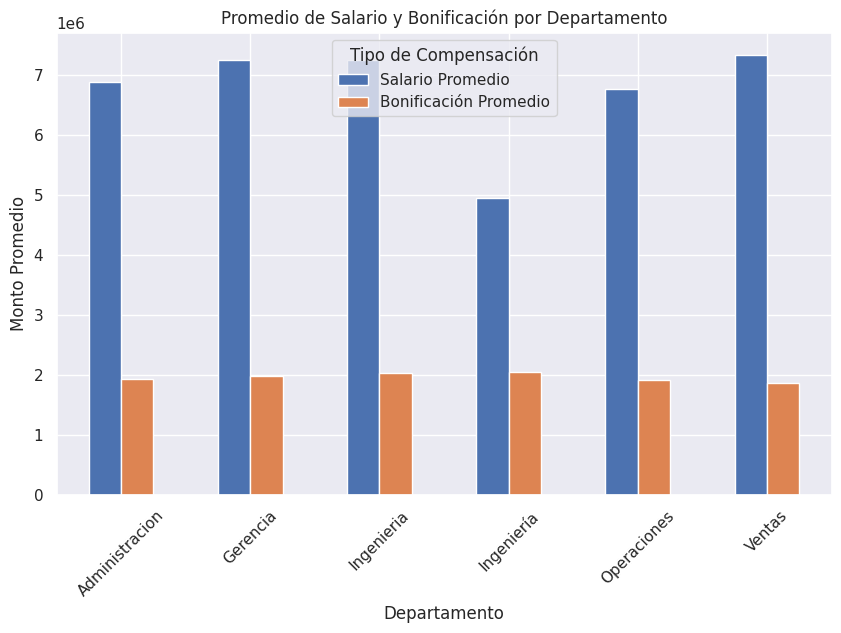

Promedio de Salario por Departamento:
departamento
Administracion    6.876902e+06
Gerencia          7.236973e+06
Ingenieria        7.248987e+06
Ingeniería        4.936200e+06
Operaciones       6.755462e+06
Ventas            7.329210e+06
Name: salario, dtype: float64

Promedio de Bonificación por Departamento:
departamento
Administracion    1.930377e+06
Gerencia          1.985927e+06
Ingenieria        2.031060e+06
Ingeniería        2.045100e+06
Operaciones       1.903770e+06
Ventas            1.857984e+06
Name: bonificacion, dtype: float64


In [26]:

# Combinar los promedios de salario y bonificación en un solo DataFrame
promedio_salario_por_departamento = df.groupby('departamento')['salario'].mean()
promedio_bonificacion_por_departamento = df.groupby('departamento')['bonificacion'].mean()

promedios_compensaciones = pd.DataFrame({
    'Salario Promedio': promedio_salario_por_departamento,
    'Bonificación Promedio': promedio_bonificacion_por_departamento})

# Graficar los promedios de salario y bonificación por departamento
promedios_compensaciones.plot(kind='bar', figsize=(10, 6))
plt.title('Promedio de Salario y Bonificación por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Monto Promedio')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Compensación')

# Mostrar el gráfico
plt.show()
print("Promedio de Salario por Departamento:")
print(promedio_salario_por_departamento)
print("\nPromedio de Bonificación por Departamento:")
print(promedio_bonificacion_por_departamento)


Qué le aporta al análisis y las conclusiones previas?

**R/**Calcular el promedio de salario y bonificación por departamento aporta una visión más detallada de las diferencias en compensación entre áreas de la empresa, lo que ayuda a identificar áreas destacadas y respalda la toma de decisiones sobre políticas de compensación. Estos promedios enriquecen el análisis anterior al proporcionar datos concretos sobre la distribución de compensaciones en la organización.